In [242]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [275]:
ll = 1000
T = 25
rand = np.random.normal(0, 1, (ll,))
#X = [i / 25 * math.sin(i * 2 * math.pi / 25) + rand[i] for i in range(400)]
t = np.linspace(0, ll, ll)
X = t**0.5 * np.sin(t * 0.5 * np.pi / T) + rand

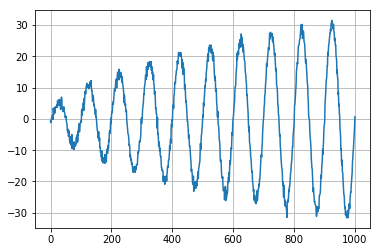

In [276]:
plt.plot(t, X)
plt.grid()
plt.show()

In [277]:
# Q = np.ones((ll,))
sigma = np.var(X) * np.ones(ll)
Q = np.ones((ll, 1))
S = np.zeros((ll, 1))
phi = 2 * np.pi * (t % T)
psi = 2 * np.pi * (t % T)
alpha = 0.5
gamma = 5

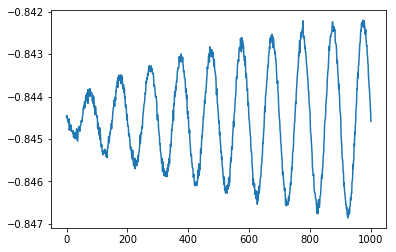

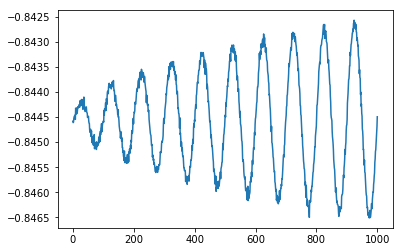

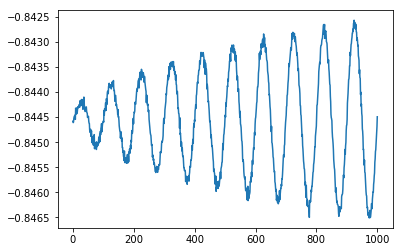

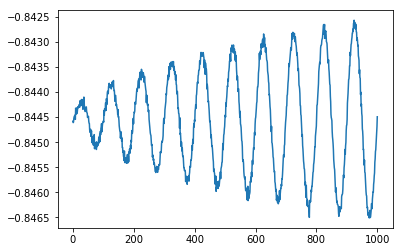

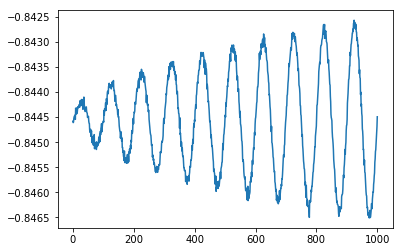

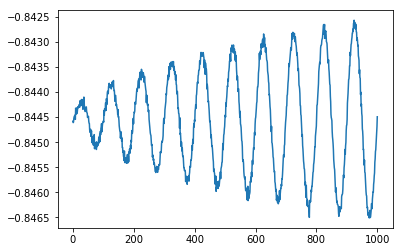

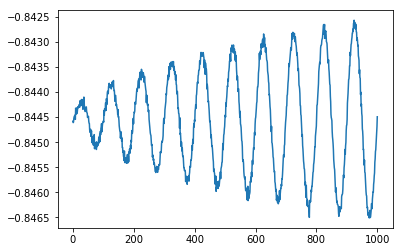

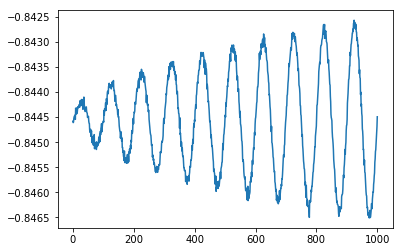

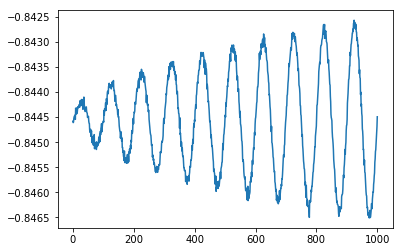

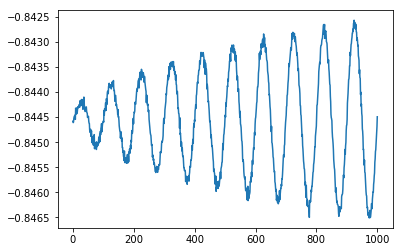

In [278]:
from copy import deepcopy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

for i in range(10):
    for j in range(len(t)):
        w = np.abs(1 - alpha) ** (-np.abs(t[j] - t) / T)
        K = (- (psi[j] - phi) ** 2 / gamma)
        S[j] = np.sum(w * X / Q * K) / np.sum(w * K)
        
    lm = LinearRegression()
    lambdas = 1 / sigma
    lm.fit(X=S.reshape(-1, 1), y=X.reshape(-1, 1), sample_weight=lambdas)
    Q = lm.predict(X.reshape(-1, 1))
    X_hat = Q.reshape(-1, 1) * S.reshape(-1, 1)
    #print(mse(X, X_hat))

    plt.plot(t, Q)
    plt.show()
    
    for j in range(len(t)):
        K = (-(psi[j] - phi) ** 2 / gamma)
        sigma[j] = np.sum((X - X_hat)**2 * K) / np.sum(K)

In [263]:
X_hat = np.zeros(X.shape)
X_hat.shape

(1000,)

In [173]:
(S.reshape(-1, 1) * Q).shape

(500, 1)